# Generate artificial data

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


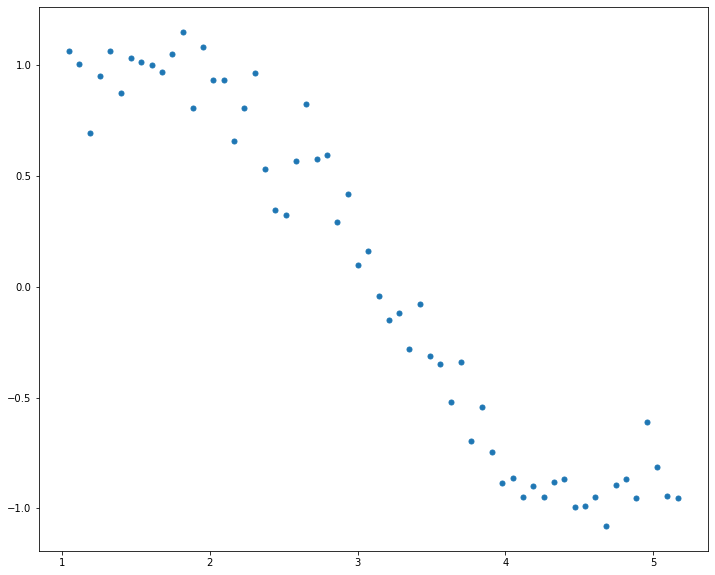

In [30]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as pl
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
pl.plot(data['x'],data['y'],'.',ms=10)

In [40]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [32]:
#geenerate dataset with sklearn functions

#from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(15)
#X = poly.fit_transform(data['x'].values.reshape(60,1))

In [41]:
data.shape

(60, 16)

In [77]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['y'], 
                                                        test_size=0.2, random_state=42)
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    linreg.fit(X_train,y_train)
    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)

    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        pl.subplot(models_to_plot[power])
        pl.tight_layout()
        pl.plot(X_train['x'],y_pred_train,'ro')
        pl.plot(data['x'],data['y'],'.')
        pl.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss_train = sum((y_pred_train-y_train)**2)/y_train.size
    rss_test  = sum((y_pred_test-y_test)**2)/y_test.size
    ret = [rss_train]
    ret.extend([rss_test])
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

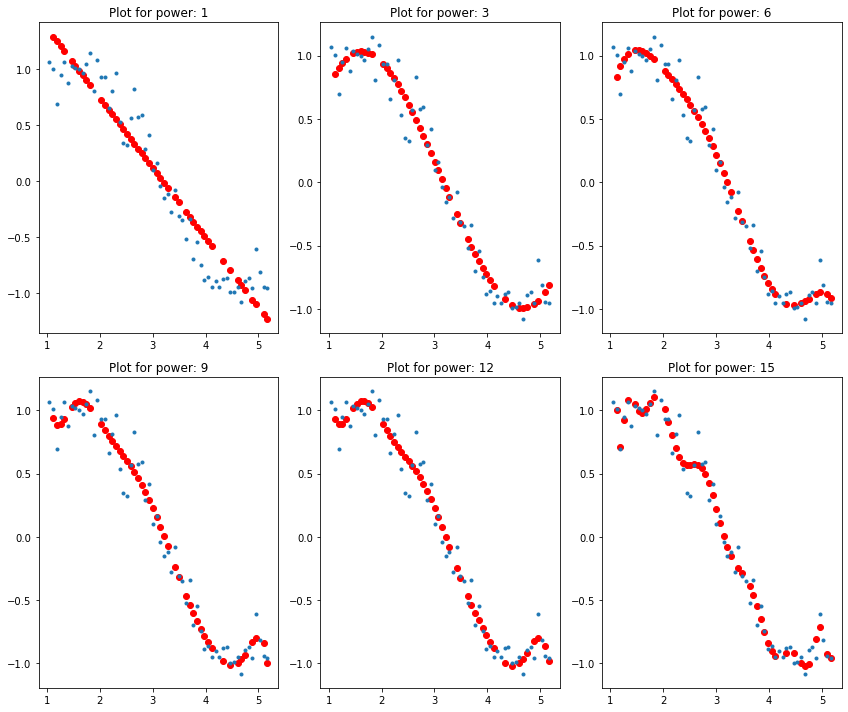

In [78]:
#Initialize a dataframe to store the results:
col = ['rss_train','rss_test','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [79]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss_train,rss_test,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,0.056,0.05,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,0.056,0.05,1.9,-0.56,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,0.02,0.015,-1.3,3.2,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,0.019,0.014,-0.86,2.6,-0.97,0.058,0.0067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,0.019,0.0099,1.3,-1.8,2.3,-1.1,0.2,-0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.018,0.02,-12,30,-28,14,-3.7,0.5,-0.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.017,0.013,9.9,-32,44,-31,12,-2.8,0.34,-0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.017,0.011,26,-86,1.2e+02,-88,38,-10,1.5,-0.13,0.0045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.016,0.0086,1.9e+02,-6.9e+02,1.1e+03,-9.5e+02,5.2e+02,-1.8e+02,41,-5.8,0.47,-0.017,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.016,0.0088,2.1e+02,-8e+02,1.3e+03,-1.2e+03,6.5e+02,-2.4e+02,59,-9.3,0.9,-0.048,0.001,NaN,NaN,NaN,NaN,NaN


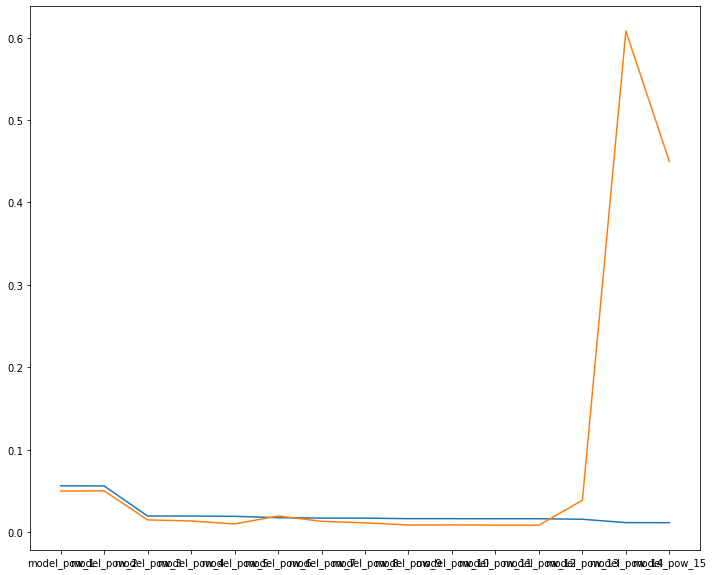

In [70]:
pl.plot(coef_matrix_simple['rss_train'])
pl.plot(coef_matrix_simple['rss_test'])